In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = "../../../../../../dataframes/envipe/TPer_Vic2/df_09_impute.csv"


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

AP6_10_1,AP6_14,AP6_15_1,AP6_19,AP6_1_1,AP6_2,AP6_20_1,AP6_3,AP6_4_01,AP6_4_02,⋯,AP7_3_09,AP7_3_10,AP7_3_11,AP7_3_12,AP7_3_13,AP7_3_14,AP7_3_15,EDAD,ESTRATO,SEXO
2,2,2,2,1,1,2,2,2,2,⋯,2,2,2,2,2,2,2,65,3,2
2,2,2,2,2,1,2,2,2,2,⋯,2,2,2,2,2,2,2,27,3,2
2,2,2,2,2,1,2,2,2,2,⋯,2,2,2,2,2,2,2,57,3,2
2,2,2,2,1,1,2,1,2,2,⋯,2,2,2,2,2,2,2,63,3,1
2,2,2,2,1,1,2,2,2,2,⋯,2,2,2,2,2,2,2,61,3,1
2,2,2,2,1,1,2,2,2,2,⋯,2,2,2,2,2,2,2,23,2,2


In [4]:
ncol(data)

[1] 30

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
AP6_10_1,0.012783813
AP6_14,0.017358084
AP6_15_1,0.005382023
AP6_19,0.018921629
AP6_1_1,0.750154781
AP6_2,0.699159031


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
28,EDAD,4.1453670
29,ESTRATO,1.0374656
5,AP6_1_1,0.7501548
6,AP6_2,0.6991590
30,SEXO,0.6908858
13,AP6_7,0.6547323


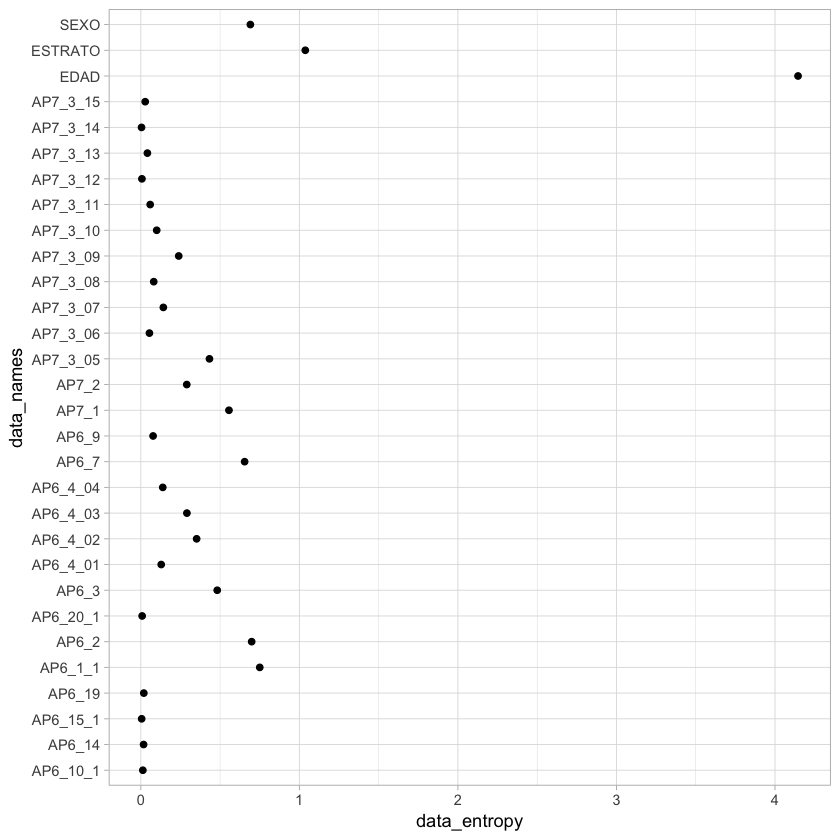

In [8]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

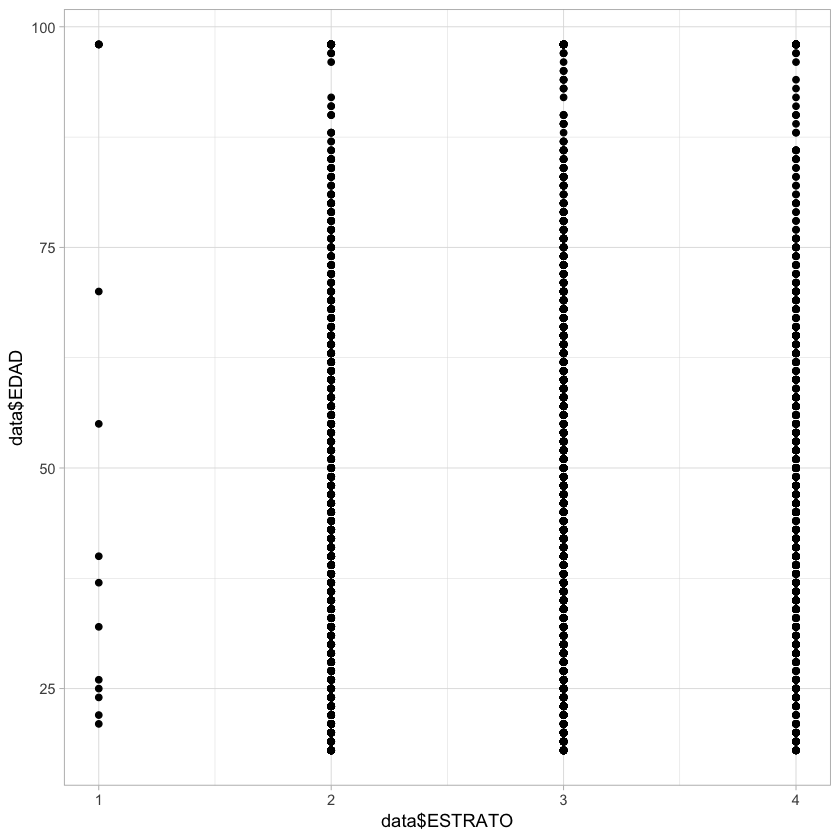

In [9]:
ggplot(data = data, 
       aes(y=data$EDAD, 
           x=data$ESTRATO)) + geom_point() + theme_light()

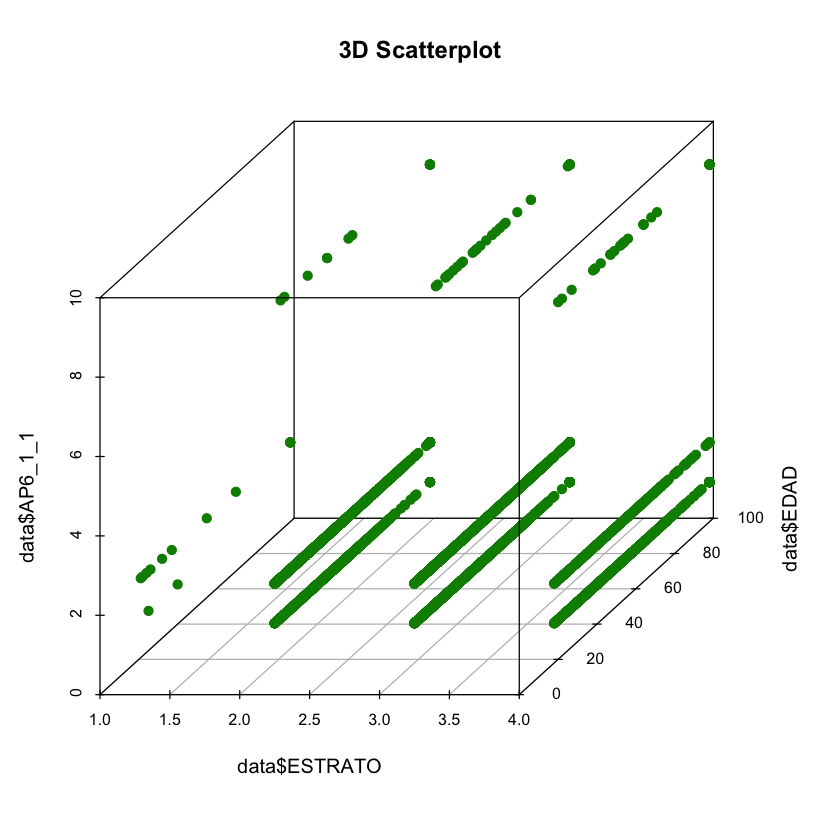

In [10]:
scatterplot3d(y=data$EDAD, 
              x=data$ESTRATO,
              z=data$AP6_1_1, pch = 19, color = "green4", main="3D Scatterplot")





In [11]:
file = "../../../../../../dataframes/envipe/TPer_Vic2/df_09_og_mixed.csv"


In [12]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
